Diese Datei dient zur Datenbereinigung von NULL Werten oder Placeholder in den Excel-Dateien

Schritt 1: Die gebrauchten Abhängigkeiten laden

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
from tkinter.messagebox import Message
import seaborn as sns

Schritt 2: Die Dateien laden

In [237]:
df = pd.read_excel(askopenfilename())

Schritt 3: Informationen über die geladene Datei anzeigen: 

In [238]:
print(df.head(10))

  datum       Abteilung                                        Krankheiten  \
0  2018  Innere Medizin    Bestimmte infektiöse und parasitäre Krankheiten   
1   NaN             NaN                             Bösartige Neubildungen   
2   NaN             NaN                                Übrige Neubildungen   
3   NaN             NaN                             Krankheiten des Blutes   
4   NaN             NaN  Endokrine, Ernährungs- und Stoffwechselkrankhe...   
5   NaN             NaN                 Psychische und Verhaltensstörungen   
6   NaN             NaN                      Krankheiten des Nervensystems   
7   NaN             NaN  Krankheiten des Auges und der Augenanhangsgebilde   
8   NaN             NaN     Krankheiten des Ohres und des Warzenfortsatzes   
9   NaN             NaN                   Krankheiten des Kreislaufsystems   

  unter 1 Jahr 1-5 jahre 5- 10 jahre 10-15 jahre 15-18 jahre 18-20 jahre  \
0          147       309         171         143         679     

In [239]:
print(df.info)

<bound method DataFrame.info of                datum                 Abteilung  \
0               2018            Innere Medizin   
1                NaN                       NaN   
2                NaN                       NaN   
3                NaN                       NaN   
4                NaN                       NaN   
...              ...                       ...   
4840             NaN                       NaN   
4841             NaN                       NaN   
4842             NaN  Unbekannte Fachabteilung   
4843             NaN                       NaN   
4844  ______________                       NaN   

                                            Krankheiten unter 1 Jahr  \
0       Bestimmte infektiöse und parasitäre Krankheiten          147   
1                                Bösartige Neubildungen            3   
2                                   Übrige Neubildungen            2   
3                                Krankheiten des Blutes            1   
4     E

Datentypen ausgeben:

In [240]:
print(df.dtypes)

datum                     object
Abteilung                 object
Krankheiten               object
unter 1 Jahr              object
1-5 jahre                 object
                          ...   
Insgesamt 80-85           object
Insgesamt 85-90           object
Insgesamt 90-95           object
Insgesamt 95 und mehr     object
Insgesamt 35-402         float64
Length: 71, dtype: object


Schritt 4: Funktionen zur Visualisierung der NULL und Dummy-Werte

In [241]:
#df.loc[1:, "TODO"] = df.loc[1: ,"TODO"].astype(float)


In [242]:
def df_if_null(df):

    plt.figure(figsize=(12,8))
    sns.heatmap(df.isnull(), cbar=False, cmap="cividis", yticklabels=False)
    
    plt.title("Heatmap der Null-Werte im DataFrame", fontsize=16)
    plt.xlabel("Spalten", fontsize=12)
    plt.ylabel("Zeilen", fontsize=12)
    plt.show()
        

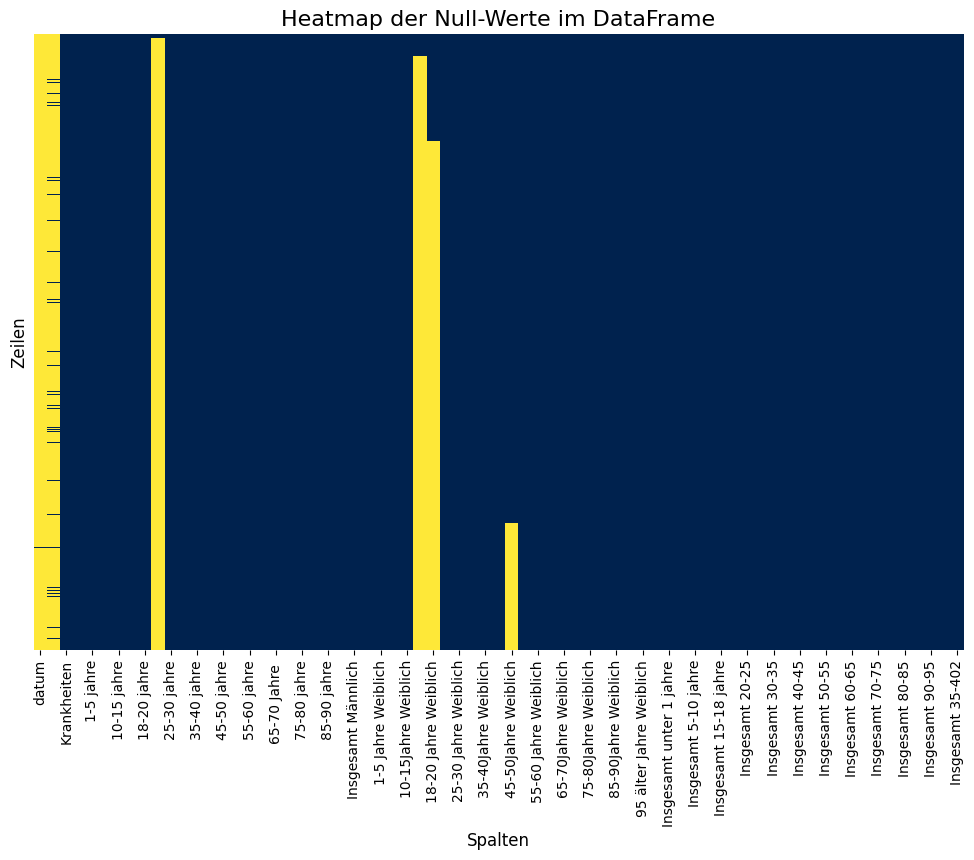

In [243]:
df_if_null(df)

In [244]:
def df_if_dummy(df, dummy_val):

    contains_dash = df.astype(str).applymap(lambda x: dummy_val in x)
    
    # Heatmap erstellen
    plt.figure(figsize=(12, 8))
    sns.heatmap(contains_dash, cbar=False, cmap="cividis", yticklabels=False)
    
    # Titel und Achsenbeschriftungen hinzufügen
    plt.title("Heatmap der Werte mit Dummys im DataFrame", fontsize=16)
    plt.xlabel("Spalten", fontsize=12)
    plt.ylabel("Zeilen", fontsize=12)
    plt.show()

/var/folders/jp/mvl5k93n6r7d_twnt5jwf1780000gn/T/ipykernel_3617/2276706382.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_dash = df.astype(str).applymap(lambda x: dummy_val in x)


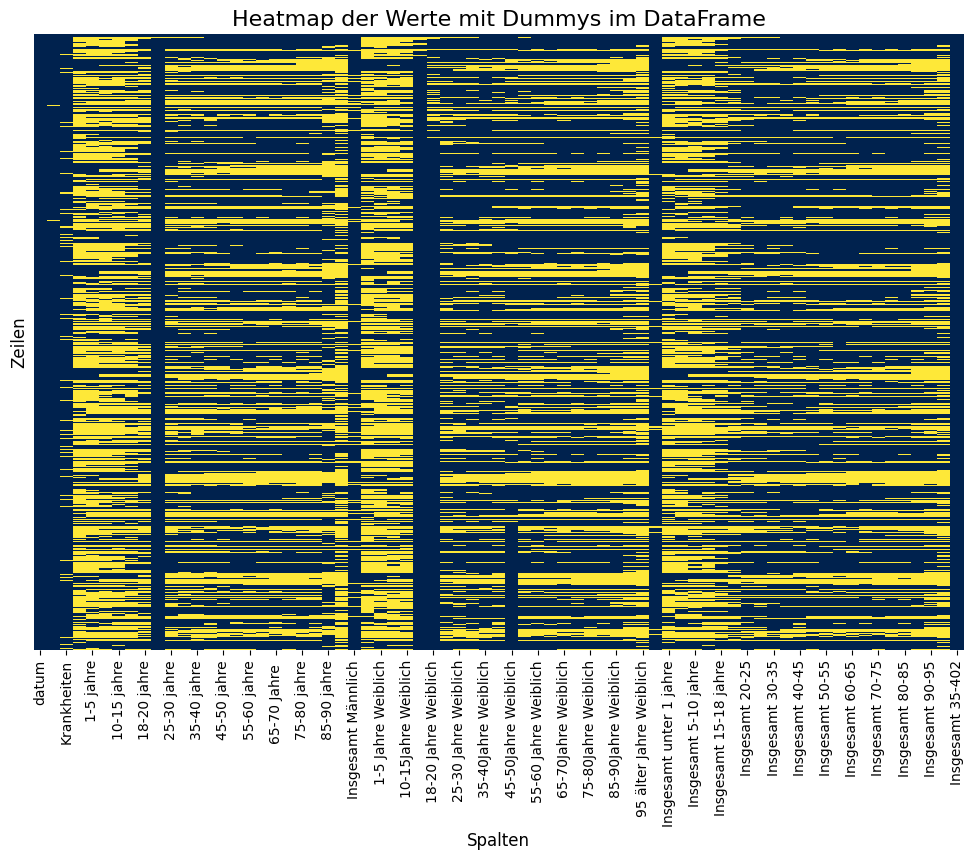

In [245]:
df_if_dummy(df, "-")

Schritt 5: Dummy und Null werte manuell oder per Funktion ersetzen

Dummys:

Speichern einer Spalte, welche nicht verändert werden soll

In [257]:
def safe_column(df, name):
    df_column = df.pop(name)
    return df_column

# df_column = safe_column(df, "TODO")

Dummys ersetzen

In [252]:

def replace_dummies(df, dummy_val, new_val):
    df = df.replace(dummy_val, new_val)
    return df

df = replace_dummies(df, "-", 0)


/var/folders/jp/mvl5k93n6r7d_twnt5jwf1780000gn/T/ipykernel_3617/4293984147.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(dummy_val, new_val)


Spalte wieder einfügen

In [258]:
def insert_column(df, df_column, pos, name):
    df.insert(pos, name, df_column)
    return df

# df = insert_column(df, df_column, 3, "TODO")

/var/folders/jp/mvl5k93n6r7d_twnt5jwf1780000gn/T/ipykernel_3617/2276706382.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_dash = df.astype(str).applymap(lambda x: dummy_val in x)


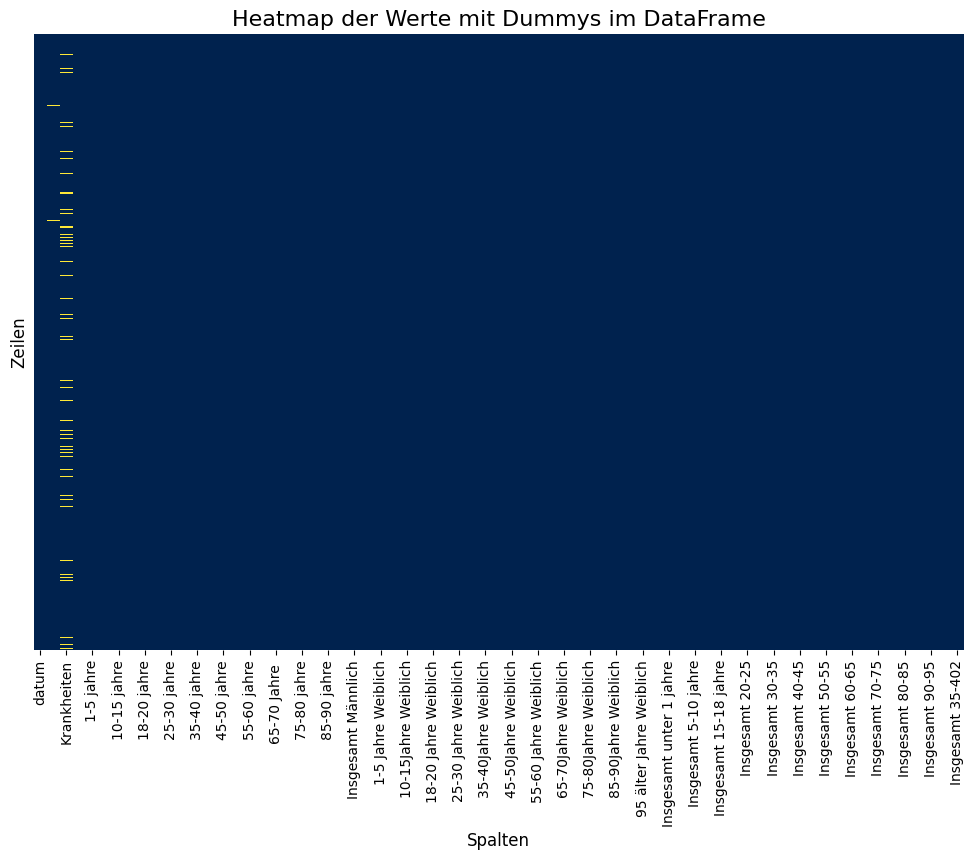

In [259]:
df_if_dummy(df,"-")